### ========================= Import Modules =========================

In [ ]:
# import python libraries
import sys, os

# Import third party libraries
import pandas as pd

# Dynamically get the current working directory and append 'src' to it
# Not needed when using pip install GeeseTools
sys.path.append(os.path.join(os.getcwd(), "src"))
from GeeseTools import DataPreProcessor as dpp

from utils import train_models as tm
from utils import evaluation as eval
from utils import plot

### =========================== Load Data ===========================

In [43]:
# Creating object for DataPreProcessor Class
obj = dpp(pd.read_csv("heart.csv"), target=["diagnosis"])

In [44]:
obj.display_all_features()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,diagnosis
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### ========================= Summary of Data ========================

In [45]:
obj.unique_value_summary()

,Unique Values,Total Values,Percentage (%)
id,920,920,100.000000
age,50,920,5.434783
sex,2,920,0.217391
dataset,4,920,0.434783
cp,4,920,0.434783
trestbps,61,861,7.084785
chol,217,890,24.382022
fbs,2,830,0.240964
restecg,3,918,0.326797
thalch,119,865,13.757225


In [46]:
obj.missing_data_summary().head() 

,Variable,Missing Count,Missing Percentage
0,id,0,0.0%
1,age,0,0.0%
2,sex,0,0.0%
3,dataset,0,0.0%
4,cp,0,0.0%


### ========================= Pre-process Data =========================

In [47]:
# Pre-processing dataset initialized in obj
X_train, X_test, y_train, y_test = obj.pre_process()

### ======================== Transformation Logs =======================

In [48]:
obj.to_numeric_log_df.head()  

,Column Name,Original Value,Converted Value,Conversion Type
0,sex,Male,male,str to str
1,sex,Male,male,str to str
2,sex,Male,male,str to str
3,sex,Male,male,str to str
4,sex,Female,female,str to str


In [49]:
obj.dropped_features_log_df.head() 

,Variable,Missing Percentage
0,slope,33.59
1,ca,66.41
2,thal,52.83


In [50]:
obj.dropped_records_log_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,diagnosis
714,715,69,male,switzerland,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,1
733,734,63,male,va long beach,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,1
743,744,74,male,va long beach,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,0
746,747,51,male,va long beach,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,1
749,750,55,male,va long beach,non-anginal,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,1


In [51]:
obj.imputation_log_df.head()      

,Variable,Imputation Method,Significant Difference,Percentage Difference
0,id,None (No Missing Values),0,0.0
1,age,None (No Missing Values),0,0.0
2,trestbps,Mean,0,1.61
3,chol,Median,1,10.98
4,thalch,Mean,0,1.75


In [52]:
obj.encode_log_df.head()          

,Column Name,Original Unique Values,Encoding Method,Encoded Unique Values
0,sex,"[male, female]",Nominal,"[1.0, 0.0]"
1,dataset,"[cleveland, hungary, switzerland, va long beach]",Nominal,"[0.0, 1.0, 2.0, 3.0]"
2,cp,"[typical angina, asymptomatic, non-anginal, at...",Nominal,"[3.0, 0.0, 2.0, 1.0]"
3,fbs,"[True, False]",Nominal,"[1.0, 0.0]"
4,restecg,"[lv hypertrophy, normal, st-t abnormality]",Nominal,"[0.0, 1.0, 2.0]"


In [53]:
obj.transformation_log_df.head()  

,Column Name,Skewness Before,Kurtosis Before,Action Taken,Skewness After,Kurtosis After
0,id,0.072783,-1.119606,Yeo-Johnson Transformation,-0.260257,-0.959040
1,age,-0.173465,-0.393720,Yeo-Johnson Transformation,-0.039004,-0.405200
2,trestbps,0.213951,2.993188,Yeo-Johnson Transformation,0.277478,2.661651
3,chol,-0.636879,0.196727,Yeo-Johnson Transformation,-1.037892,0.089642
4,thalch,-0.211240,-0.476804,Yeo-Johnson Transformation,-0.054580,-0.596636


In [54]:
obj.scale_log_df.head()

,Column Name,Scaling Method,Original Min,Original Max,Scaled Min,Scaled Max
0,id,Standard,-2.174470,1.658970,-2.174470,1.658970
1,age,Standard,-2.498275,2.699519,-2.498275,2.699519
2,dataset,Standard,0.000000,3.000000,-1.051200,1.741251
3,cp,Standard,0.000000,3.000000,-0.811481,2.354026
4,trestbps,Standard,-6.688428,3.605130,-6.688428,3.605130


### ========================= Train NN Model =========================

In [55]:
model, task_type, history = tm.train_model(X_train, y_train)

🔍 Classification problem detected.


### ========================= Evaluate Model =========================

In [56]:
metric, y_pred = eval.evaluate_model(model, X_test, y_test, task_type)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 81.03%


Plotting Confusion Matrix (Classification)


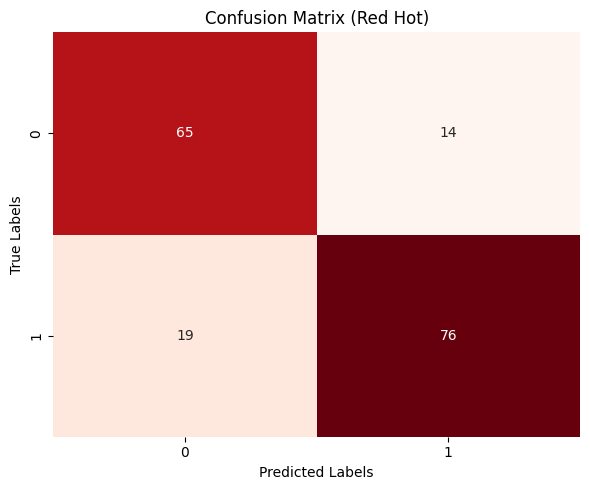

In [57]:
plot.plot_classification_outputs(y_test, y_pred)